# scikit-learn

# scikit-learn 一般性原理和通用规则
1 .评估模型对象
svm.SVC（）函数返回的就是 个支持向 机评估模型对象 创建评估模型对象时，可以指
定不同的参数，这个称为评估对象参数，评估对象参数直接影响评估模型训练时的效率以
及准确性。
2.模型接口
scikit-le arn 所有的评估模型对象都有 fit（）这个接口，这是用来 练模型的接口。针对
有监督的机器学习（如上面的例子〉，使用 fit(X, ）来进行训练，其中 是标记数据。针
对无监督的机器学习算法，使用自t(X）来进行训练，因为无监督机器学习算法的数据集是
没有标记的，不需要传入
针对所有的有监督机器学习算法， sc ikit-leam 模型对象提供了 predict（） 接口，经过
训练的模型，可以用这个接口来进行预测。针对分类问题，有些模型还提供了 predict
proba（）的接口，用来输出 个待预测的数据，属于各种类型的可能性，而 predict（） 接口直
接返回了可能性最高的那个类别
3.模型检验
器学习应用开发的 个非常重要的方面就是模型检验，即需要检测我们训
模型，针对“没见过的”陌生数据其预测准确性如何 除了模型提供的 core（） 接口外，在skleam.metrics 包的下面 系列用来检测模型性能的方法
4.模型选择
模型选择是个非常重要的课题，根据要处理的问题性质，数据是否经过标记？数据规
模多大？等等这些问题，可以对模型有个初步的选择 scikit-learn 官方 站上提供了
个模型速查表 只要回答几个简单的问题就可以选择 个相对合适的模型。感兴趣的读者
可以搜索 scikit-l eam algorithm cheat sheet 来查看这个图片，
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# 梯度下降法   实现

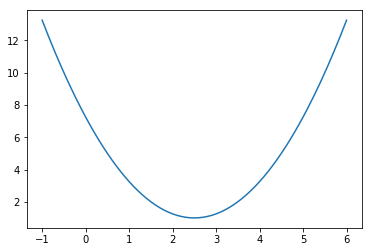

In [261]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1,6,141)
y = (x-2.5) ** 2 + 1
plt.plot(x,y)

In [262]:
# J 的导数
def dJ(theta):
    return 2*(theta - 2.5)

def J(theta):
    return (theta - 2.5) ** 2 -1

2.4999999534293074
-0.9999999999999978


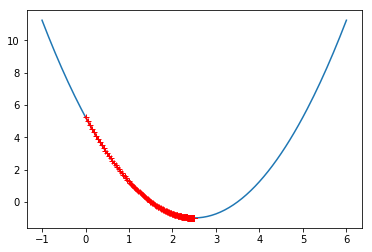

In [263]:
eta = 0.01  #学习率
epsilon = 1e-20   #精度
theta = 0.0
all_theta = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * dJ(theta)
    all_theta.append(theta)
    if (J(last_theta) - J(theta)) < epsilon:
        break
print(theta)
print(J(theta))
    
plt.plot(x,J(x))
plt.plot(np.array(all_theta),J(np.array(all_theta)),marker='+',c='r')

# 用批量梯度下降法训练数据

(100000, 1)

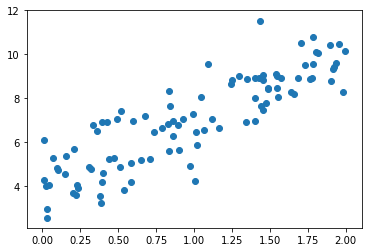

In [321]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

plt.scatter(x,y)
X.shape

In [322]:
#计算 成本值
def J(theta,x_b,y):
    try:
        return np.sum((y - x_b.dot(theta))**2) / len(x_b)
    except:
        return np.float('inf')

#计算梯度
def dJ(theta,x_b,y):
#     res = np.empty(len(theta))
#     res[0] = np.sum(x_b.dot(theta) - y)
#     for i in range(1,len(theta)):
#         res[i] = (x_b.dot(theta) - y).dot(x_b[:,i])

    return x_b.T.dot((x_b.dot(theta) - y))* 2 / len(x_b) #向量化呀


#梯度下降
def gradient_descent(x_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta = initial_theta
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta,x_b,y)
        last_theta = theta
        theta = theta - eta * gradient

        if abs(J(theta,x_b,y) - J(last_theta,x_b,y)) < epsilon:
            break
        i_iter += 1

    return theta


x_b = np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01

theta = gradient_descent(x_b,y,initial_theta,eta)
theta



array([4.02145786, 3.00706277])

## 随机梯度下降法

In [134]:
import numpy as np

m = 100000

x = np.random.normal(size=m)
X =  x.reshape(-1,1)
Y = 4. * x + 3. + np.random.normal(0,3,size=m)


In [142]:
%%time 
x_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01

theta = gradient_descent(x_b,Y,initial_theta,eta)

TypeError: gradient_descent() missing 1 required positional argument: 'eta'

In [136]:
theta #批量结果

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

In [139]:
def dJ_sgd(theta,x_b_i,y_i):
    return x_b_i.T.dot(x_b_i.dot(theta) - y_i) * 2.
    

def sgd(x_b,y,initial_theta,n_iters):
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rangd_i = np.random.randint(len(x_b))
        gradient = dJ_sgd(theta,x_b[rangd_i],y[rangd_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta
def learning_rate(t):
    return 5 / (50 + t)


In [140]:
%%time 
x_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01

theta = sgd(x_b,Y,initial_theta,n_iters=len(x_b)//3)

Wall time: 288 ms


In [141]:
theta

array([3.06273128, 3.98657057])

 ## sklearn 中的SGD 随机梯度下降法

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
X = boston.data
Y = boston.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=666)

#数据归一化
standardscaler = StandardScaler()
standardscaler.fit(x_train)

x_standardscaler = standardscaler.transform(x_train)
x_test_stand = standardscaler.transform(x_test)

sgd = SGDRegressor(n_iter=100)
sgd.fit(x_standardscaler,y_train)
sgd.score(x_test_stand,y_test)

0.6521855156522804

#### 使用梯度下降法前，最好进行数据归一化

## 关于梯度的调试

In [77]:
import numpy as np

np.random.seed(666)
x = np.random.random(size=(1000,10))
true_theta = np.arange(1,12,dtype=float)

In [101]:
x_b = np.hstack([np.ones((len(x),1)),x])

y = x_b.dot(true_theta) + np.random.normal(size=1000)

In [128]:
def J(theta,x_b,y):
    try :
        return np.sum((y - x_b.dot(theta))**2) / len(x_b)
    except:
        return float('inf')

#数学推导
def dJ_math(theta,x_b,y):
    return x_b.T.dot(x_b.dot(theta) - y) * 2 / len(y)


#用于调试
def dJ_debug(theta,x_b,y,epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1,x_b,y) - J(theta_2,x_b,y)) / (2*epsilon)
    return res
    

def gradient_descent(dJ,x_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta,x_b,y)
        last_theta = theta
        theta = theta - eta * gradient
        if abs(J(theta,x_b,y) - J(last_theta,x_b,y)) < epsilon:
            break
        cur_iter += 1
    return theta



In [129]:
x_b = np.hstack([np.ones((len(x),1)),x]) 
inital_theta = np.zeros(x_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug,x_b,y,inital_theta,eta)
theta

Wall time: 3.92 s


array([ 0.90835074,  2.27783675,  3.03608562,  3.96472955,  4.96383789,
        6.13271003,  7.11435903,  7.89288214,  8.89898567,  9.88136085,
       10.93881607])

# 主成分分析 PCA
1，一个非监督的机器学习算法

2.主要用于数据的姜维，通过姜维可以发现便于人类理解的特征

3。可视化，去噪

## 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
np.random.seed(666)
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0.,10,size=100)

#### demean  均值归零

In [3]:
def demean(X):
    return X - np.mean(X,axis=0)  #按列

In [4]:
def f(W,X):
    return np.sum(X.dot(W)**2) / len(X)

def df_math(W,X):
    return X.T.dot(X.dot(W)) * 2. / len(X)

def df_debug(W,X,epsilon=0.0001):
    res = np.empty(len(W))
    for i in range(len(W)):
        W_1 = W.copy()
        W_1[i] += epsilon
        W_2 = W.copy()
        W_2[i] -= epsilon
        res[i] = (f(W_1,X) - f(W_2,X)) / (2 * epsilon)
    return res

In [5]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    
    W = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(W,X)
        last_W = W
        W = W + eta * gradient
        W = direction(W)         #注意1. 每次求一个单位向量
        if abs(f(W,X) - f(last_W,X)) < epsilon:
            break
            
        cur_iter += 1
        
    return W

In [6]:
#注意二。不能使用归一化，方差为1，不能求得最大值
x_demean = demean(X)
initial_w = np.random.random(X.shape[1])
eta = 0.001

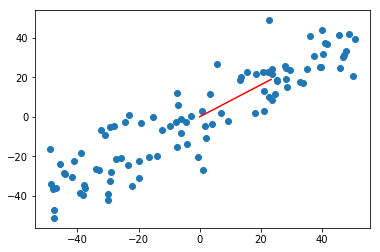

In [7]:
w = gradient_ascent(df_math,x_demean,initial_w,eta)

plt.scatter(x_demean[:,0],x_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],c='r')

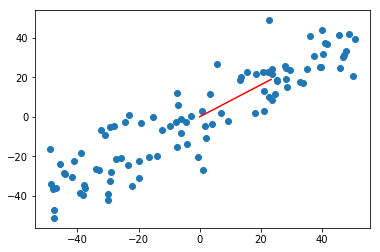

In [8]:
gradient_ascent(df_debug,x_demean,initial_w,eta)

#使用 debuge 测试
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],c='r')

In [9]:
def gradient_ascent(df,X,initial_w,eta=0.01,n_iters=1e4,epsilon=1e-8):
    
    W = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(W,X)
        last_W = W
        W = W + eta * gradient
        W = direction(W)         #注意1. 每次求一个单位向量
        if abs(f(W,X) - f(last_W,X)) < epsilon:
            break
            
        cur_iter += 1
        
    return W

def next_component(X,w):
    return X - X.dot(w).reshape(-1,1) * w

def n_first_components(n,X,eta=0.01,n_iters=1e5,epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = gradient_ascent(df_math,X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = next_component(X_pca,w)
        
    return res    


In [10]:
x_demean = demean(X)
initial_w = np.random.random(x_demean.shape[1])
eta = 0.001

w = gradient_ascent(df_math,x_demean,initial_w,eta)
w

array([0.77660967, 0.62998208])

In [13]:
n_com = n_first_components(2,X)
n_com

[array([0.77660933, 0.6299825 ]), array([ 0.62998536, -0.77660701])]

In [58]:
pca = PCA(n_components=1)
pca.fit(X)

pca.components_

array([[-0.77660922, -0.62998263]])

## scikit-learn 中的PCA

In [18]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [20]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=666)

In [107]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)


Wall time: 88.8 ms


In [108]:
knn_clf.score(X_test,Y_test)

0.9866666666666667

In [59]:
pca = PCA(n_components=2)
pca.fit(X_train)
# pca.components_

x_train_decom = pca.transform(X_train)
x_test_decom  = pca.transform(X_test)

In [60]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_decom,Y_train)


Wall time: 1.99 ms


In [66]:
knn_clf.score(x_test_decom,Y_test)

0.6066666666666667

In [65]:
pca.explained_variance_ratio_   #解释方差比例 

array([0.14566817, 0.13735469])

In [80]:
pca = PCA(n_components=64)
pca.fit(X_train)
pca.explained_variance_ratio_ 

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

Text(0.5, 1.0, '前N分解释方差比例的和')

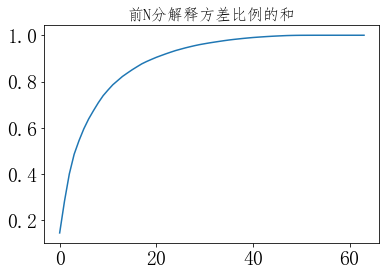

In [88]:
import matplotlib.pyplot as plt
plt.style.use("rbp")
#画出前N个解释方差比例的和，找到想要的n_com
plt.plot([i for i in range(X_train.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.title("前N分解释方差比例的和",size=16)


#  #scikit-learn 中的用法

In [98]:
pca = PCA(0.95) #数据维度
pca.fit(X_train)
pca.n_components_  #达到0.95 的
pca.n_components   #数据包含元数据信息的比例

0.95

In [111]:
pca = PCA(n_components=28)
pca.fit(X_train)
x_train_decom = pca.transform(X_train)
x_test_decom = pca.transform(X_test)

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_decom,Y_train)
knn_clf.score(x_test_decom,Y_test)

0.98

In [129]:
pca = PCA(n_components=2)  #降到二维画图 
pca.fit(digits.data)
x = pca.transform(digits.data)
x.shape

(1797, 2)

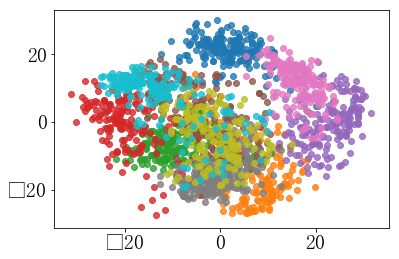

In [128]:
for i in range(10):
    plt.scatter(x[digits.target==i,0],x[digits.target==i,1],alpha=0.8)


# MNIST 数据集  手写数据识别

In [229]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels.idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images.idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels


In [256]:
path = "MNIST/"
X_train,y_train = load_mnist(path,kind='train')
X_test,y_test = load_mnist(path,kind='t10k')

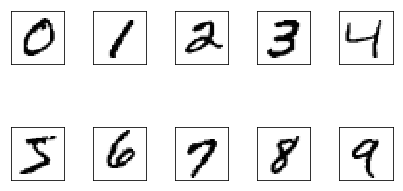

In [257]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten() # ax.flatten()将ax由n*m的Axes组展平成1*nm的Axes组
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout() #tight_layout会自动调整子图参数，使之填充整个图像区域
plt.show()


## PCA 可以降低噪音  -- 数据量很大时很有用

# 人脸识别 === 特征脸

In [61]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt

In [62]:
faces = fetch_lfw_people()  #数据集没有下载完全

In [63]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [64]:
len(faces.data)

2985

In [65]:
random_indexs = np.random.permutation(len(faces.data))
X = faces.data[random_indexs]

In [66]:
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

In [117]:
def plot_faces(faces):
    """绘制出脸的图片"""
    fig, axes = plt.subplots(6,6,figsize=(10,10),
                             subplot_kw={'xticks':[],'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1)
                            )
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62,47),cmap='bone')
    plt.show()

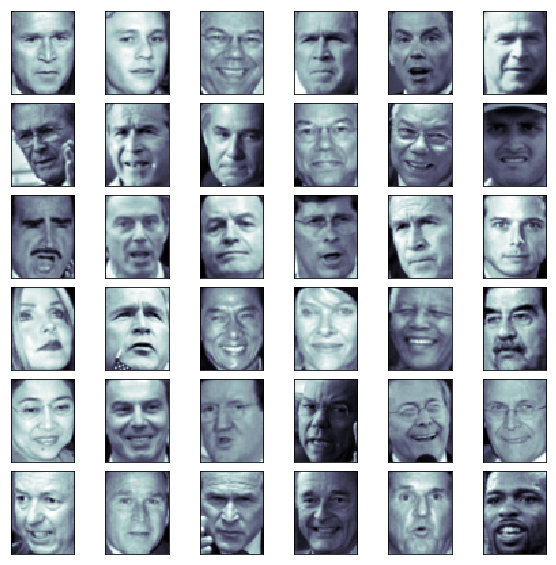

In [68]:
plot_faces(example_faces)

In [69]:
len(faces.target_names)

338

### 特征脸

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca  = PCA(svd_solver="randomized")
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [72]:
pca.components_.shape

(2914, 2914)

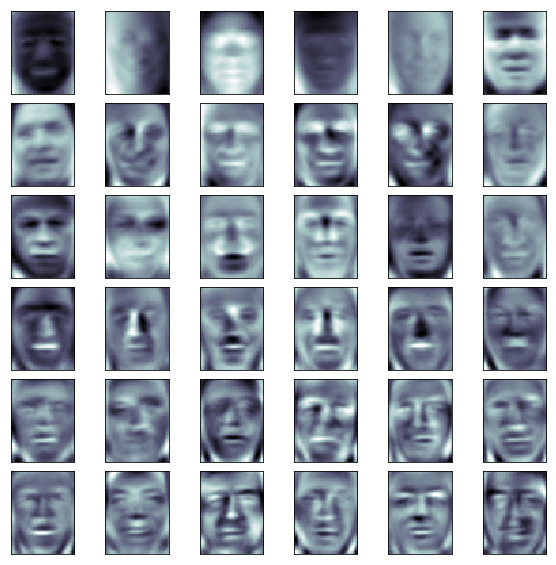

In [73]:
plot_faces(pca.components_[:36,:])

In [74]:
faces2 = fetch_lfw_people(min_faces_per_person=20)  
#提区照片数量大于20的数据

len(faces2.target_names)

30

# 评价分类结果
### 精确率 召回率

In [40]:
# 混淆矩阵
# 精确率  precision = TP/(TP + FP)
# 召回率  recall = TP/(TP + FN)

In [3]:
import numpy as np
from sklearn import datasets

digitis = datasets.load_digits()
x = digitis.data
y = digitis.target.copy()
y[digitis.target == 9] = 1
y[digitis.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666)

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [5]:
y_predict = log_reg.predict(x_test)

In [6]:
def TN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))


def FP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))


def FN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))


def TP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

# confusion_matrix
def confusion_matrix(y_true,y_predict):
    return np.array([
        [TN(y_test,y_predict),FP(y_true,y_predict)],
        [FN(y_true,y_predict),TP(y_true,y_predict)]
    ])


# precision_score
def precision_score(y_true,y_predict):
    tp = TP(y_true,y_predict) 
    fp = FP(y_true,y_predict) 
    try :
        return tp / (tp + fp)
    except:
        return 0.0

# recall_score
def recall_score(y_true,y_predict):
    tp = TP(y_true,y_predict)
    fn = FN(y_true,y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0

In [7]:
recall_score(y_test,y_predict)

0.8

### scikit-learn 中精确率 召回率的使用

In [8]:
from sklearn.metrics import confusion_matrix  #混淆矩阵
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

confusion_matrix(y_test,y_predict)
# precision_score(y_test,y_predict)
# recall_score(y_test,y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

#### F1 Score
兼容 precision recall

计算用 调和平均值   f1 = 2*(precision * recall) / (precision + recall)

In [9]:
#自己实现
def f1_score(y_true,y_predict):
    try:
        return 2 * precision_score(y_true,y_predict) * recall_score(y_true,y_predict) / (precision_score(y_true,y_predict) + recall_score(y_true,y_predict))
    except:
        return 0.0

f1_score(y_test,y_predict)

0.8674698795180723

#### scikit-learn 中的F1 Score

In [10]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict)  #在其中计算了 precision和recall

0.8674698795180723

### precision--recall 的平衡
相互影响 一减一增

In [11]:
decision_scores = log_reg.decision_function(x_test)  #计算样本的分数值默认为0

y_predict2 = np.array(decision_scores > -5,dtype='int') #分数值为5

confusion_matrix(y_test,y_predict2)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [12]:
precision_score(y_test,y_predict2)

0.7272727272727273

In [13]:
recall_score(y_test,y_predict2)
f1_score(y_test,y_predict2)

0.7999999999999999

### precision---recall 曲线

In [15]:
import matplotlib.pyplot as plt
presisions =[]
recalls =[]
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)  #门槛
for threshold in thresholds:
    y_predict = np.array(decision_scores  > threshold,dtype='int')
    presisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

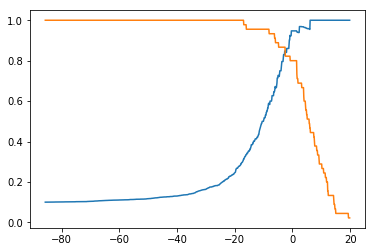

In [18]:
plt.plot(thresholds,presisions,thresholds,recalls)
plt.show()

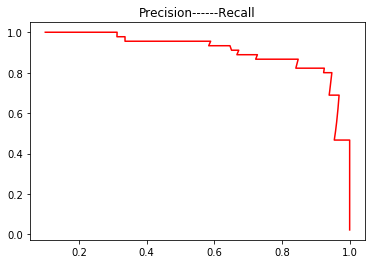

In [102]:
plt.plot(presisions,recalls,c='r')
plt.title("Precision------Recall")
plt.show()

#### scikit-learn 中的用法

In [19]:
from sklearn.metrics import precision_recall_curve

In [20]:
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)
#注意参数

In [21]:
precisions.shape

(145,)

In [22]:
recalls.shape

(145,)

In [23]:
thresholds.shape

(144,)

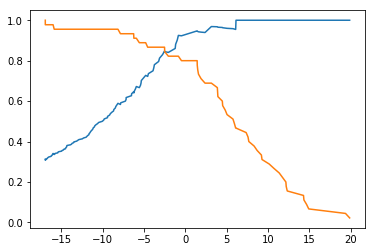

In [26]:
plt.plot(thresholds,precisions[:-1],thresholds,recalls[:-1])
plt.show()

Text(0.5, 1.0, 'Precisions-----Recalls')

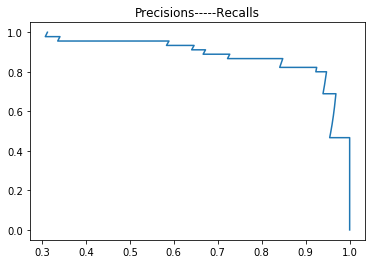

In [25]:
plt.plot(precisions,recalls)
plt.title("Precisions-----Recalls")

### ROC曲线  比较模型的优劣
FPR = FP / (TN＋ＦP)

TPR = TP / (TP + FN)

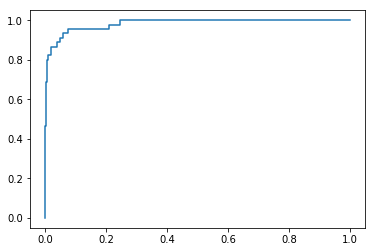

In [36]:
# sklearn 中的实现
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test,decision_scores)

plt.plot(fprs,tprs)
plt.show()

In [37]:
#计算roc_curve面积 ,评价模型的好坏
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,decision_scores)

0.9830452674897119

### 多分类指标

In [64]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix
import numpy as np

In [43]:
digits = datasets.load_digits()
x = digitis.data
y = digits.target

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666)

In [54]:
log_reg = LogisticRegression(multi_class='auto')
log_reg.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_predict = log_reg.predict(x_test)

In [56]:
precision_score(y_test,y_predict,average='micro')

0.9555555555555556

In [66]:
cfm = confusion_matrix(y_test,y_predict)

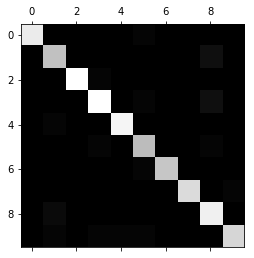

In [68]:
#画出矩阵图形
plt.matshow(cfm,cmap=plt.cm.gray)   
plt.show()

In [73]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
#填充对角线的值
np.fill_diagonal(err_matrix, 0) 

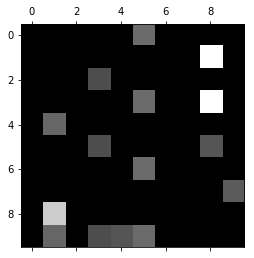

In [71]:
plt.matshow(err_matrix,cmap=plt.cm.gray)   
plt.show()

# 机器学习理论基础
# 常用库 ：https://www.cnblogs.com/lianyingteng/p/7749609.html
3.1过拟合和欠拟合
过拟合是指模型能很好地拟合训练样本，但对新数据的预测准确性很差。 欠拟合是指
模型不能很好地拟合训练样本，且对新数据的预测准确性也不好

另外一个更科学的方法是把数据集分成3份，分别是训练数据集 交叉验证数据集测试数据集，推荐比例是 6:2:2

# 3.4 学习曲线
我们可以把 Jtrain(theta)（创作为纵坐标，画出与训练数据集 的大小关系，这就是学
习曲线。通过学习曲线，可以直观地观察到模型的准确性与训练数据集大小的关系。
如果数据集的大小为m，则通过下面的流程即可画出 学习曲线

·把数据集分成训练数据集和 交叉验证数据集。
·取训练数据集的20%作为训练样本，训练出模型参数。
·使用交叉验证数据集来计算训练出来的模型的准确性。
·以训练数据集的准确性，交叉验证的准确性作为纵坐标，训练数据集个数作为横坐
标，在坐标轴上画出上述步骤计算出来的模型准确性
·训练数据集增加 10% ，跳到步骤3继续执行，直到训练数据集大小为100%为止。

学习曲线要表达的内容是，当训练数据集增加时，模型对训练数据集拟合的准确性以
及对交叉验证数据集预测的准确性的变化规律
sc -l earn 里面，我们不用自己去实现学习曲线算法，直接使用 
sklearn.selection.learning_ curve()函 数来画出学习曲线  curve:曲线

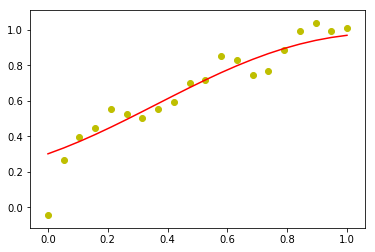

In [13]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)
n_dots = 20
x = np.linspace(0,1,n_dots)
y = np.sqrt(x) + 0.2*np.random.rand(20) - 0.1
svr = svm.SVR(kernel='rbf',C=1,degree=10,gamma='auto') 
#阶数不同，出现过拟合和欠拟合。表现为高偏差
svr.fit(x[:,np.newaxis],y)
y_p = svr.predict(x[:,np.newaxis])

plt.scatter(x,y,c='y')
plt.plot(x,y_p,c='r')

svr.score(y[:,np.newaxis],y_p)
from sklearn import cross_decomposition  #交叉验证

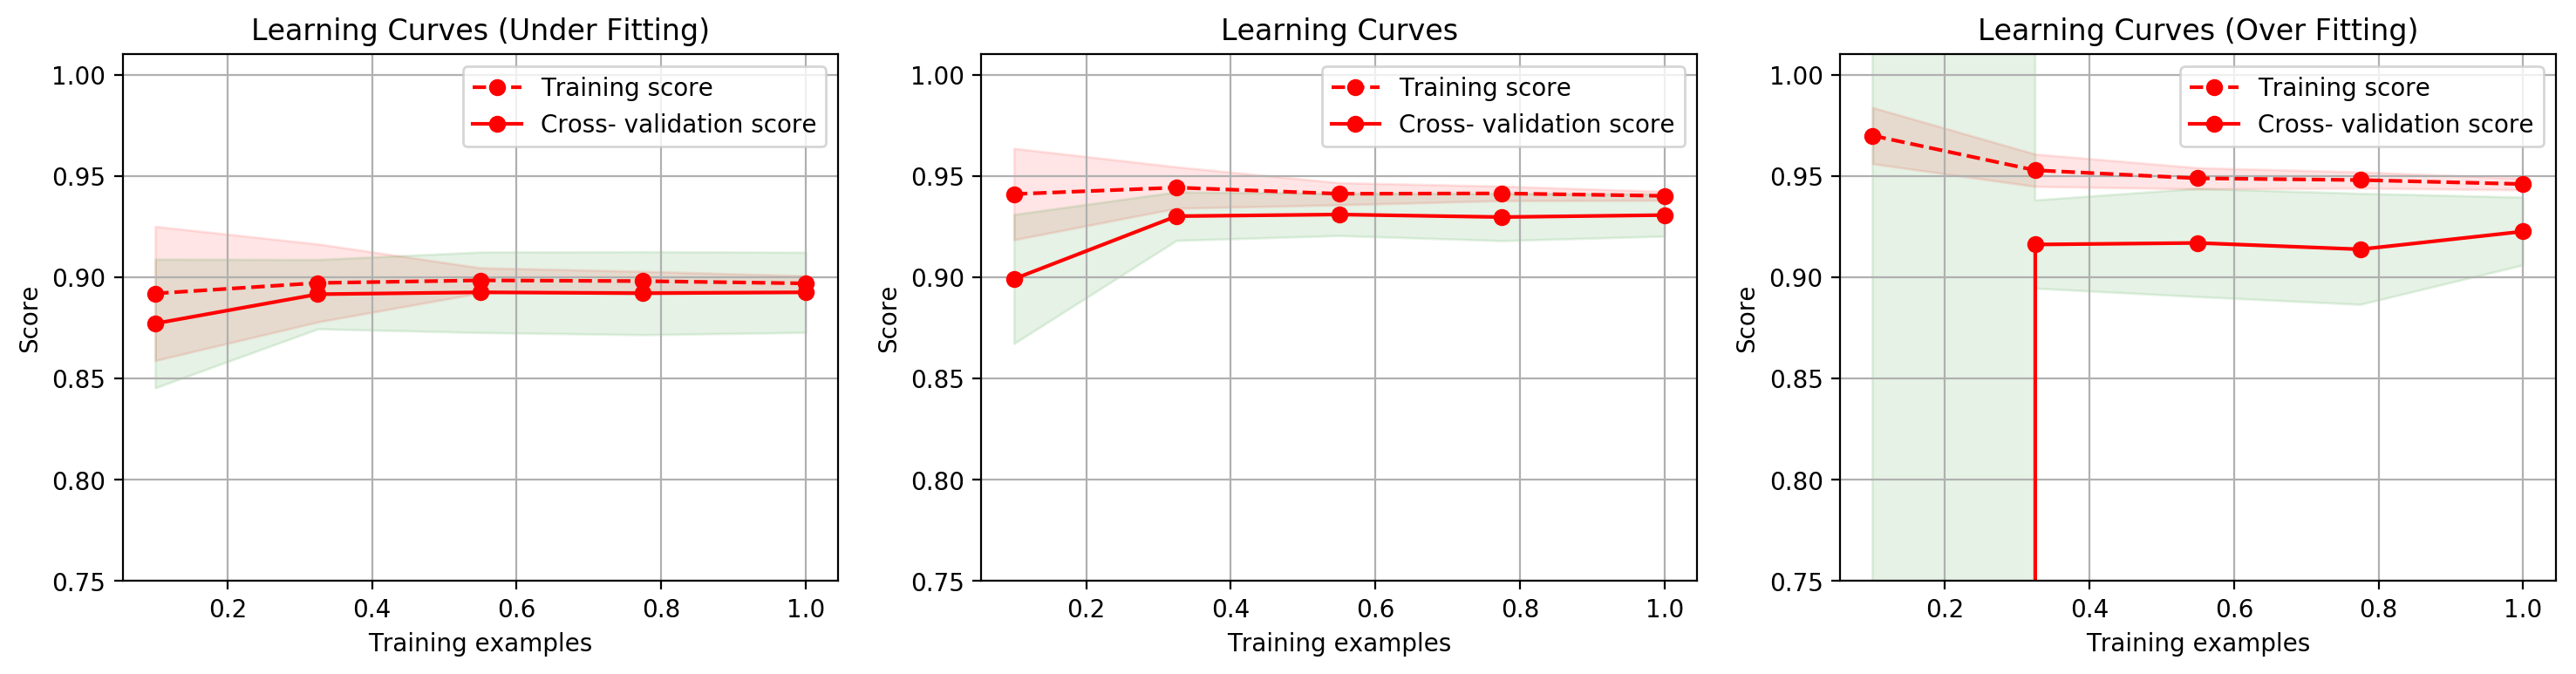

In [35]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline  
#流水线这个流水线里可以包含多个数据处理模型，构建多项式模型
from sklearn.preprocessing import PolynomialFeatures #预处理，多项式特征
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit #ShuffleSplit:随机播放拆分

# np.random.seed(0)
n_dots = 200
x = np.linspace(0,1,n_dots)
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1
x = x.reshape(-1,1)
y = y.reshape(-1,1)

def polynomial_model(degree=1): #度
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False) #包括偏差
    
    linear_regression = LinearRegression()
    # 这是个流水线，先增加多项式阶数，后再用线性回归算法来拟合数据
    pipline = Pipeline([("polynomial_features",polynomial_features),
                        ("linear_regression",linear_regression)])
    return pipline


def plot_learning_curve(estimator,title,x,y,ylime=None,cv=None,
                       n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):  
    plt.title(title)
    if ylime is not None:
        plt.ylim(*ylime)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_size,train_scores ,test_scores = learning_curve(
        estimator,x,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std,color='r',alpha=0.1)
    
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std,color= "g",alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o--',color="r",
label="Training score")
    plt.plot(train_sizes, test_scores_mean,'o-',color="r",
label="Cross- validation score" )
    plt.legend(loc="best")
    return plt
  
    
    
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
titles = [ 'Learning Curves (Under Fitting)',
          'Learning Curves',
          'Learning Curves (Over Fitting)']

degrees = [ 1,3,10]

plt.figure (figsize=(18,4),dpi=200)
for i in range (len(degrees)) :
    plt.subplot(1,3,i + 1)
    plot_learning_curve(polynomial_model(degrees[i]),titles[i],x,y,ylime=(0.75,1.01),cv=cv)
plt.show () 

    
    
#polynomial_ model()函数生成 个多项式模型，其中参数 degree 表示多项式的阶数，
# sc -l earn 里面，我们不用自己去实现学习曲线算法，
# #直接使用 klearn.model_selection.learing_curve()函 数来画出学习曲线   曲线
# 其中 train_sizes 参数就是训练、样本数 的变化规则，比如 train_sizes=np.linspace(.l, 1.0, 表示把训 练样本数量从
# 0.1 分成五等分，生成 [0.1 '0.325, 0.55 ' 0.775, ］的序列，从序列中取出训练样本数量
# 百分比，逐个计算在当前训练样本数量情况下训练出来的模型准确性。


# 3.2 成本函数
成本是衡量模型与训练样本符合程度的指标。简单地理解， 成本是针对所有的训练样
本，模型拟合出来的值与训练样本的真实值的误差平均值 而成本函数就是成本与模型参
数的函数关系。模型训练的过程，就是找最合适的模型参数，使得成本函数的值最小。成
本函数记为 J(theta) 其中theta表示模型参数.
一阶：y = a0x0+a1x1 [a0,a1]构成的参数就是模型参数
练这个模型的目标，就是找最出合适的模型参数[a0,a1] 使得所有的点到这条直线上的距离最短

# 多项式回归

array([1.00828728])

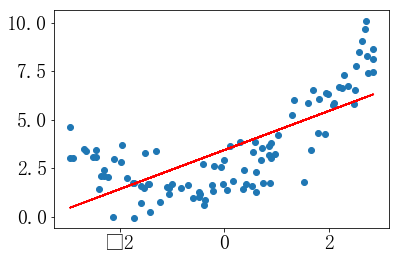

In [92]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
# np.random.permutation(100)

y = .5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

Y = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(x,Y,c='r')
lin_reg.coef_


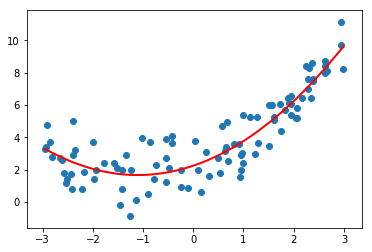

In [157]:
x1 = X**2
lin_reg.fit(np.hstack([X,x1]),y)
y2 = lin_reg.predict(np.hstack([X,x1]))
plt.plot(np.sort(x),y2[np.argsort(x)],c='r',linewidth=2)
plt.scatter(x,y)

# 多项式回归和Pipeline


In [171]:
import numpy as np
import matplotlib.pyplot as plt

x  =  np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = .5 * x**2 + x + 2 + np.random.normal(0,1,100)  #list 相加

In [215]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)  #(100,6)


In [216]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

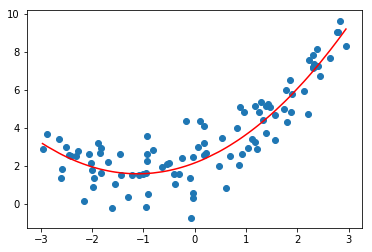

In [217]:
predict_2 = lin_reg.predict(X2)
plt.scatter(x,y)
plt.plot(np.sort(x),predict_2[np.argsort(x)],c='r')

In [222]:
lin_reg.coef_ #和输入的特征值位置对应

array([0.        , 1.02828592, 0.46214894])

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Pipline 需要实例化
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])


In [234]:
poly_reg.fit(X2,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [56]:
predict_3 = poly_reg.predict(X2)
plt.scatter(x,y)
plt.plot(np.sort(x),predict_3[np.argsort(x)],c='r')

NameError: name 'poly_reg' is not defined

# 欠拟合和过拟合     模型的泛化能力

array([0.        , 1.53207907])

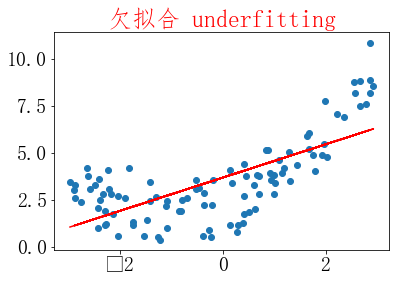

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error  #均方误差

np.random.seed(0)
plt.style.use("rbp")
x = np.random.uniform(-3,3,100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)
lin_reg = LinearRegression()
def PolyRegression(degree):
    return Pipeline([
        ('ploynomialFeatures',PolynomialFeatures(degree)),
        ('standardscaler',StandardScaler()),
        ('lineargression',lin_reg)])
poly_reg1 = PolyRegression(degree=1)
poly_reg1.fit(X,y)
predict_1 = poly_reg1.predict(X)
plt.scatter(x,y)
plt.plot(x,predict_1,c='r')

plt.title("欠拟合 underfitting",color='r')
mean_squared_error(y,predict_1)
lin_reg.intercept_
lin_reg.coef_

# 算法所训练的模型不能完整表述数据关系

0.5820367969684702

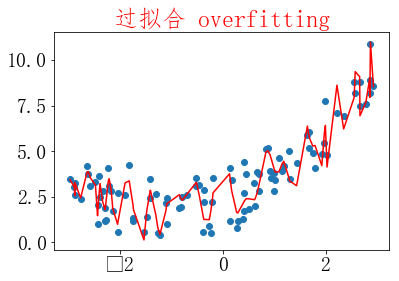

In [102]:
poly_reg1 = PolyRegression(degree=100)
poly_reg1.fit(X,y)
predict_1 = poly_reg1.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),predict_1[np.argsort(x)],c='r')

plt.title("过拟合 overfitting",color='r')
mean_squared_error(y,predict_1)


# 算法所训练的模型过多的表达了数据间的噪音关系

Text(0.5, 1.0, '过拟合实际曲线')

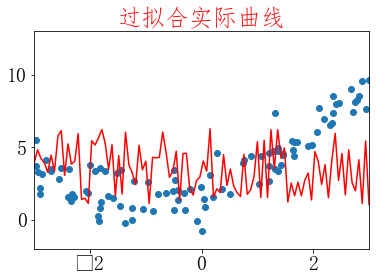

In [87]:
x2 = np.linspace(-3,3,100)
plt.plot(x2,predict_1,c='r')
plt.scatter(x,y)
plt.axis([-3,3,-2,13])
plt.title("过拟合实际曲线",color='r')

# 学习曲线

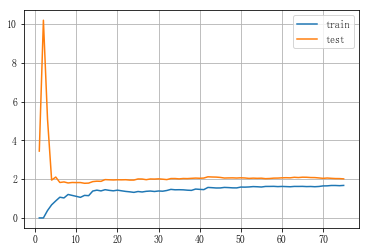

In [5]:
from sklearn.model_selection  import train_test_split
np.random.seed(666)
x  =  np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = .5 * x**2 + x + 2 + np.random.normal(0,1,100)  #list 相加

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10) 

train_score = []
test_score = []
for i in range(1,len(x_train)+1):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train[:i],y_train[:i])
    pr_x_train = lin_reg.predict(x_train[:i])
    train_score.append(mean_squared_error(y_train[:i],pr_x_train))
    
    pr_x_test = lin_reg.predict(x_test)
    test_score.append(mean_squared_error(y_test,pr_x_test))

plt.plot([i  for i in range(1,76)],np.sqrt(train_score),label="train")
plt.plot([i  for i in range(1,76)],np.sqrt(test_score),label="test")
plt.legend()
plt.grid()


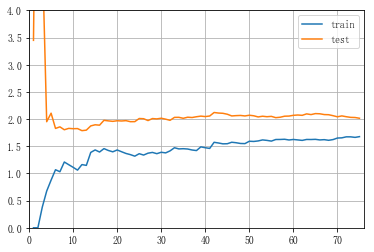

In [25]:
def PolyRegression(degree):
    return Pipeline([
        ('ploynomialFeatures',PolynomialFeatures(degree)),
        ('standardscaler',StandardScaler()),
        ('lineargression',LinearRegression())])

x  =  np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = .5 * x**2 + x + 2 + np.random.normal(0,1,100)  #list 相加
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10)
    
from sklearn.model_selection  import train_test_split

def plot_learing_curve(algo,x_train,x_test,y_train,y_test):
    np.random.seed(666) 

    train_score = []
    test_score = []
    for i in range(1,len(x_train)+1):
       
        algo.fit(x_train[:i],y_train[:i])
        pr_x_train = algo.predict(x_train[:i])
        train_score.append(mean_squared_error(y_train[:i],pr_x_train))

        pr_x_test = algo.predict(x_test)
        test_score.append(mean_squared_error(y_test,pr_x_test))

    plt.plot([i  for i in range(1,len(x_train) + 1)],np.sqrt(train_score),label="train")
    plt.plot([i  for i in range(1,len(x_train) + 1)],np.sqrt(test_score),label="test")
    plt.legend()
    plt.axis([0,len(x_train) + 1,0,4])
    plt.grid()
plot_learing_curve(LinearRegression(),x_train,x_test,y_train,y_test)

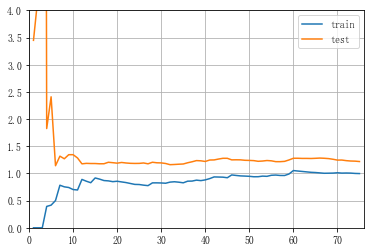

In [26]:
poly2_reg = PolyRegression(degree=2)
plot_learing_curve(poly2_reg,x_train,x_test,y_train,y_test)

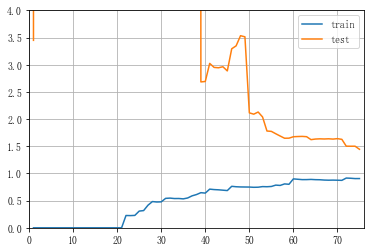

In [30]:
poly2_reg = PolyRegression(degree=20)
plot_learing_curve(poly2_reg,x_train,x_test,y_train,y_test)

# 交叉验证  解决对单一数据的过拟合

In [35]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [42]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=666)
best_score,best_p,best_k = 0, 0, 0

for k in range(2,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights="distance",n_neighbors=k,p=p)
        knn_clf.fit(x_train,y_train)
        score = knn_clf.score(x_test,y_test)
        if score > best_score:
            best_score,best_p,best_k = score, p, k
print("Best K:",best_k)
print('Best P:',best_p)
print("Best Score:",score)

Best K: 3
Best P: 4
Best Score: 0.980528511821975


# 使用交叉验证  

In [77]:
from sklearn.model_selection import cross_val_score  #交叉验证 cv
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf,x_train,y_train,cv=3)

array([0.98895028, 0.97777778, 0.96629213])

In [78]:
#交叉验证调参
best_score,best_p,best_k = 0, 0, 0
for k in range(2,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights="distance",n_neighbors=k,p=p)
        scores = cross_val_score(knn_clf,x_train,y_train,cv=3)
        score = np.mean(scores)
        if score > best_score:
            best_score,best_p,best_k = score, p, k
print("Best K:",best_k)
print('Best P:',best_p)
print("Best Score:",score)

Best K: 2
Best P: 2
Best Score: 0.9739642320947802


In [58]:
# help(cross_val_score)

# 网格搜索

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(2,11)],
        'p':[i for i  in range(1,6)]
    }
]

grid_search = GridSearchCV(knn_clf,param_grid,verbose=1,cv=3)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.0s
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [84]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [86]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [88]:
grid_search.best_score_

0.9823747680890538

In [89]:
grid_search.best_index_

1

# k-folds 交叉验证   把训练集分成k份

缺点：每次训练k个模型，训练速度慢k倍

留一法 LOO-CV：Leave-One-Out Validation
完全不受随机的影响，最接近模型真正的性能指标

# 偏差 方差
偏差和方差增减相反
机器学习的主要挑战====方差
解决高方差的通常手段：
1.降低模型复杂度
2,。减少数据维度；降噪
3，增加样本数
4.使用验证集

# 模型正则化 岭回归 多项式的系数会很大 j解决偏差，方差过大

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
# np.random.seed(42)
x =  np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = .5 * x**2 + x + 3 + np.random.normal(0,1,size=100)

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline(
    [
        ('ploy',PolynomialFeatures(degree=degree)),
        ('standar',StandardScaler()),
        ('lin_reg',LinearRegression(0))
    ])

In [158]:
from sklearn.model_selection import train_test_split
# np.random.seed(666)
X_train,x_test,y_train,y_test = train_test_split(X,y)

In [159]:
from sklearn.metrics import mean_squared_error
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train,y_train)

y_poly_predict = poly_reg.predict(x_test)
mean_squared_error(x_test,y_poly_predict)

5.706865019753145

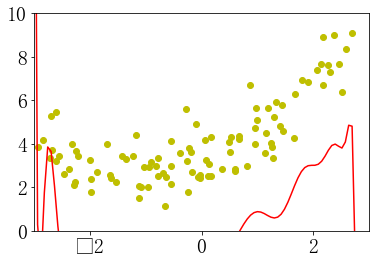

In [177]:
x_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg.predict(x_plot)
plt.plot(x_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,10])
plt.scatter(x,y,c='y')

In [180]:
def plot_model(model):
    x_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,10])
    plt.scatter(x,y,c='g')

# 使用岭回归

9.041754847910477

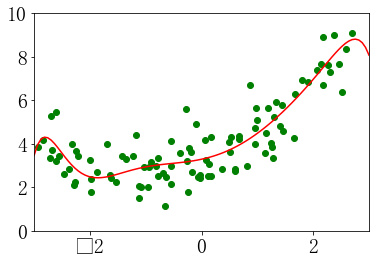

In [204]:
from sklearn.linear_model import Ridge
def RidgeRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('standar',StandardScaler()),
        ('ridge',Ridge(alpha=alpha))
    ])
#ridge 岭
ridge_reg = RidgeRegression(degree=10,alpha=00.01)
ridge_reg.fit(X_train,y_train)
y_ridge_predict = ridge_reg.predict(x_test)

plot_model(ridge_reg)
mean_squared_error(y_ridge1_predict,y_test)

# LASSO 回归  LASSO趋向于是的一部分theta值变0，所以可以作为特征选择用

In [214]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lin_reg = PolynomialRegression(degree=20)
lasso.fit(X_train,y_train)
lin_reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=0, n_jobs=None, normalize=False))])

In [217]:
y_pre = lasso.predict(x_test)
y_pre_l = lin_reg.predict(x_test)
mean_squared_error(y_pre,y_test)
mean_squared_error(y_pre_l,y_test)

14.824552093902913

In [218]:
def RidgeRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('standar',StandardScaler()),
        ('lasso',Lasso(alpha=alpha))
    ])

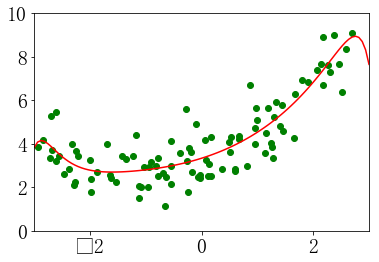

In [241]:
lasso_reg = RidgeRegression(20,0.01)
lasso_reg.fit(X_train,y_train)
lasso_predict = lasso_reg.predict(x_test)
plot_model(lasso_reg)

In [83]:
mean_squared_error(lasso_predict,y_test)

NameError: name 'mean_squared_error' is not defined

# 决策树

In [51]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

In [52]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

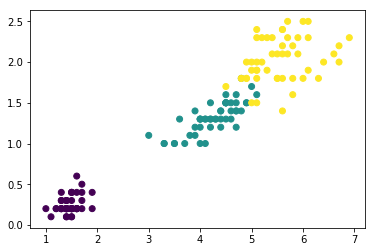

In [53]:
plt.scatter(X[:,0],X[:,1],c=y)

In [54]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(max_depth=2,criterion='entropy')#商
dec_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
    np.linspace(axis[0],axis[1],num=500),
    np.linspace(axis[2],axis[3],num=500)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidths=5,cmap=custom_cmap)


D:\anaconda\lib\site-packages\matplotlib\contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


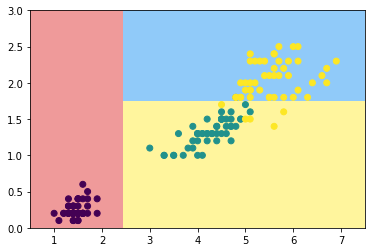

In [56]:
plot_decision_boundary(dec_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[:,0],X[:,1],c=y)


# 信息熵
1，熵在信息论中代表随机变量的不确定度的度量

2.熵越大，数据的不确定性越高，，熵越小，数据的不确定性越低

3.在 p=0.5 时达到最大

### 模拟使用信息熵进行划分

In [68]:
#实现维度的和值划分
def split(X,y,d,value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a],X[index_b],y[index_a],y[index_b]

In [73]:
from collections import Counter    
#该模块实现了专用的容器数据类型来替代python的通用内置容器：
#dict（字典），list（列表）， set（集合）和tuple（元组）

#计算数据熵
def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * np.log(p)
    return res


def try_split(X,y):  
    best_entropy = float('inf')
    best_d,best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if  X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d]) / 2
                x_l,x_r,y_l,y_r = split(X,y,d,v)
            
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy,best_d,best_v = e, d, v

    return best_entropy,best_d,best_v

In [75]:
best_entropy,best_d,best_v =  try_split(X,y)

In [81]:
x1_l,x1_r,y1_l,y1_r  = split(X,y,best_d,best_v)

In [82]:
best_entropy2,best_d2,best_v2 = try_split(x1_r,y1_r)

In [83]:
x2_l,x2_r,y2_l,y2_r  = split(x1_r,y1_r,best_d2,best_v2)

In [89]:
entropy(y2_l)

0.30849545083110386

### 基尼系数

#### gini 和信息熵的区别不大，执行快一些。默认为 gini

## CART 分类和回归树

In [137]:
# 剪枝 解决过拟合  超参数调整
from sklearn import datasets
import matplotlib.pyplot as plt 


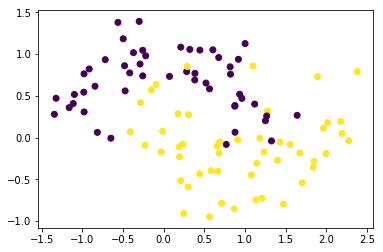

In [104]:
X,y = datasets.make_moons(n_samples=100,noise=0.25,random_state=666)
plt.scatter(X[:,0],X[:,1],c=y)

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dec_clf1 = DecisionTreeClassifier()
dec_clf1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
    np.linspace(axis[0],axis[1],num=500),
    np.linspace(axis[2],axis[3],num=500)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)


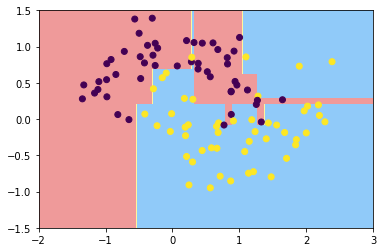

In [110]:
plot_decision_boundary(dec_clf1,[-2,3,-1.5,1.5])
plt.scatter(X[:,0],X[:,1],c=y)

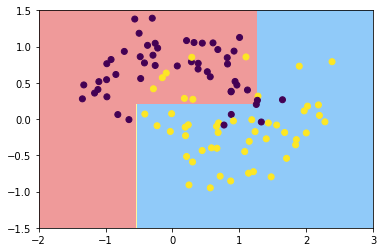

In [121]:
dec_clf2 = DecisionTreeClassifier(max_depth=2)

dec_clf2.fit(X,y)

plot_decision_boundary(dec_clf2,[-2,3,-1.5,1.5])
plt.scatter(X[:,0],X[:,1],c=y)

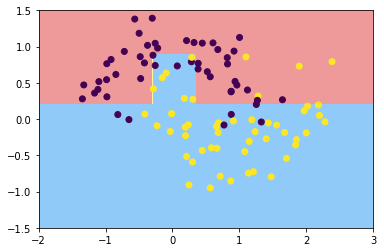

In [127]:
dec_clf3 = DecisionTreeClassifier(min_samples_leaf=6)

dec_clf3.fit(X,y)

plot_decision_boundary(dec_clf3,[-2,3,-1.5,1.5])
plt.scatter(X[:,0],X[:,1],c=y)

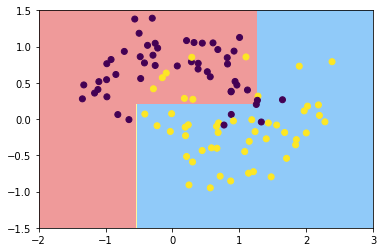

In [138]:
dec_clf4 = DecisionTreeClassifier(max_leaf_nodes=4)

dec_clf4.fit(X,y)

plot_decision_boundary(dec_clf4,[-2,3,-1.5,1.5])
plt.scatter(X[:,0],X[:,1],c=y)

## 决策树的局限性很大   对数据特别敏感   依赖于调参   主要应用在随机森林

# 集成学习  
hard --- Voting Classifier


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
from  sklearn import datasets
X,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=42) 
#生成随机数据集，make_circles and make_moons生成环形形状和月亮形状数据


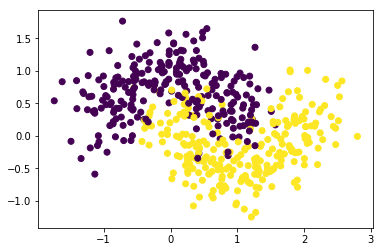

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [140]:
from  sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression  #逻辑回归
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(x_test,y_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.864

In [144]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train,y_train)
svc_clf.score(x_test,y_test)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.888

In [23]:
from sklearn.tree import DecisionTreeClassifier  #决策树聚类
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train,y_train)
dec_clf.score(x_test,y_test)

0.88

In [35]:
y1 = log_reg.predict(x_test)
y2 = svc_clf.predict(x_test)
y3 = dec_clf.predict(x_test)

predict = np.array((y1 + y2 + y3) >= 2,dtype='int')

In [33]:
from sklearn.metrics import accuracy_score  #准确度
accuracy_score(y_test,predict)

0.904

In [68]:
from sklearn.ensemble import VotingClassifier #集成学习  合奏
vot_clf = VotingClassifier(
    estimators=[
    ('log_reg',LogisticRegression()),
    ('svc_clf',SVC(gamma='auto')),
    ('dec_clf',DecisionTreeClassifier())
    
],voting='hard')  #估计器

In [145]:
vot_clf.fit(X_train,y_train)

NameError: name 'vot_clf' is not defined

In [71]:
vot_clf.score(x_test,y_test)  #和前面的一样

0.904

### soft ----votingclassifiter

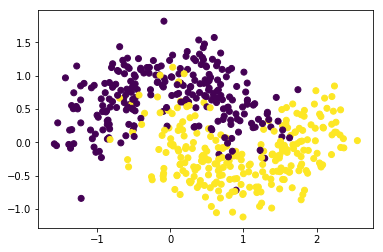

In [30]:
from sklearn import datasets
import matplotlib.pyplot as plt


X,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=666)


from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,random_state=666)

plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [31]:
vot_clf = VotingClassifier(
estimators=[
    ('Log_reg',LogisticRegression()),
    ('svc',SVC(probability=True)),
    ('dec_clf',DecisionTreeClassifier(random_state=666))
],voting='soft')
#为sotf时  svc中的参数probabliity 必须给 默认为FALSE 


In [26]:
vot_clf.fit(X_train,y_train)


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('Log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('svc', SV...       min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [27]:
vot_clf.score(x_test,y_test)

0.896

In [21]:
from sklearn.metrics import accuracy_score
vot_predict = vot_clf.predict(x_test)
accuracy_score(y_test,vot_predict)

0.888

### 集成学习威力巨大 
1.Bagging 放回取样，最常用
2.Pasting 不放回取样
3.统计学中，放回取样 bootstrap

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


X,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=42)
X_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,max_samples=100,
                            bootstrap=True,random_state=42)  #bootstrap 参数控制取样类型

In [58]:
bag_clf.fit(X_train,y_train)

bag_clf.score(x_test,y_test)

0.896

In [59]:
#单纯的决策树模型
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train,y_train)

dec_clf.score(x_test,y_test)

0.848

## OOB Out-of-Bag
1.放回取样导致一部分样本很有可能没有取到

2，大约有37%的样本没有取到

3，不使用测试数据集，而是用这部分没有取到的样本做测试/验证。

4.oob_score_ 属性


In [60]:
%%time
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,
                            bootstrap=True,random_state=42,
                            oob_score=True,n_jobs=-1)  
#bootstrap 参数控制取样类型
#oob_score=True 记录为渠道的数据
#n_jobs=-1 并行运行的bag_clf数目
bag_clf.fit(X_train,y_train)

bag_clf.score(x_test,y_test)

bag_clf.oob_score_  #oob测试结果

Wall time: 540 ms


### Bagging 的跟多探讨 --- 样本差异化
1.针对特征进行随机采样   Random Subspaces

2.既针对样本，有针对特征进行随机采样   Random Patches

### bootstrap_features

In [77]:
%%time
#特征随机采样
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,max_samples=500,
                            bootstrap=True,random_state=42,
                            oob_score=True,n_jobs=-1,
                           max_features=1,bootstrap_features=True)  
#bootstrap 参数控制取样类型
#oob_score=True 记录为渠道的数据
#n_jobs=-1 并行运行的bag_clf数目
bag_clf.fit(X,y)

bag_clf.oob_score_  #oob测试结果

Wall time: 57.8 ms


In [82]:
%%time
#特征和样本随机采样
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,max_samples=100,
                            bootstrap=True,random_state=42,
                            oob_score=True,n_jobs=-1,
                           max_features=2,bootstrap_features=True)  
#bootstrap 参数控制取样类型
#oob_score=True 记录为渠道的数据
#n_jobs=-1 并行运行的bag_clf数目
bag_clf.fit(X,y)

bag_clf.oob_score_  #oob测试结果

Wall time: 56.8 ms


# 随机森林
1.集成学习是指将多种学习算法，通过适当的形式组合起来完成同一个任务。在集成学习中，主要分为bagging
算法和boosting算法
2.随机森林（Random Forest）是bagging算法中最重要的一种算法，通过对数据集的采样生成多个不同的数据集，并在每一个数据集上训练一棵分类树，最终结合每一棵分类树的预测结果作为随机森林的预测结果
3.熵（Entropy）是度量样本集合纯度最常用的一种指标，在划分后数据集D的信息熵减小了，对于给定的数据集，划分前后信息熵的减少量称为信息增益

In [8]:
from sklearn.ensemble import RandomForestClassifier    #随机森林
from sklearn.ensemble import ExtraTreesClassifier      #及其随机的树

In [20]:
rdf_cls = RandomForestClassifier(n_estimators=500,oob_score=True,bootstrap=True,max_leaf_nodes=5)
rdf_cls.fit(X,y)

rdf_cls.oob_score_

0.866

In [16]:
ext_clf = ExtraTreesClassifier(n_estimators=100,bootstrap=True,oob_score=True,max_leaf_nodes=5)

ext_clf.fit(X,y)

ext_clf.oob_score_

0.86

 #  Boosting
 ### Ada Boosting   集成多个模型 每个模型都在尝试增强（Boosting）整体的效果

In [33]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
X,y = datasets.make_moons(n_samples=300,noise=0.3,random_state=666)
X_train,x_test,y_train,y_test = train_test_split(X,y)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf  = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100,random_state=666)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=666)

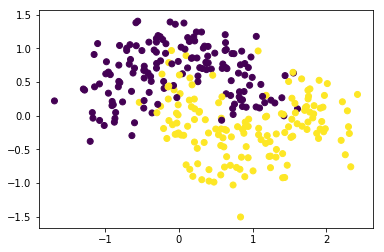

In [34]:
ada_clf.score(x_test,y_test)
plt.scatter(X[:,0],X[:,1],c=y)

###  Gradient Boosting    训练模型mi，不断对产生的错误ei 进行训练，最终结果为 m1+m2 +.....

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gdb_clf = GradientBoostingClassifier(max_depth=2,n_estimators=100) #本来就是决策树

gdb_clf.fit(X_train,y_train)

In [43]:
gdb_clf.score(x_test,y_test)

0.9066666666666666

## Stacking   sklearn中没有集成
1，将模型的输出作为训练数据当做其他训练模型的输入训练。

# 逻辑回归

In [11]:
# Sigmoid 函数
import numpy as np
import matplotlib.pyplot as plt 
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y,c='r')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [61]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train,X_test,Y_train,Y_test = train_test_split(X[:,:2],Y,random_state=666)

log_reg = LogisticRegression(solver='lbfgs',C=10)
log_reg.fit(X_train,Y_train)

log_reg.score(X_test,Y_test)

# log_reg.predict_proba(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7894736842105263

In [24]:
log_reg.coef_

log_reg.intercept_

array([-14.02857616])

### 决策边界

In [43]:
#返回决策边界的值
def split_line(t):
    return -(log_reg.intercept_[0] + log_reg.coef_[0,0] * t) / log_reg.coef_[0,1]

x = np.linspace(4,7,300)
y = split_line(x)

# plt.plot(x,y)
# plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

In [46]:
#换出决策区域
def split_boundary_plot(model,axis):
    x = np.linspace(axis[0],axis[1],500)
    y = np.linspace(axis[2],axis[3],500)
    
    X,Y = np.meshgrid(x,y)
    Z = model.predict(np.c_[X.ravel(),Y.ravel()])
    zz = Z.reshape(X.shape)
    
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x,y,zz,cmap=cmap)

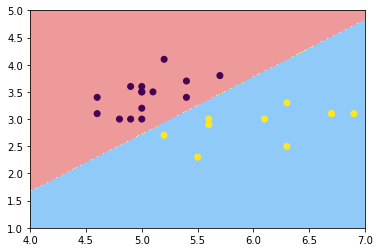

In [47]:
split_boundary_plot(log_reg,[4,7,1,5])
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

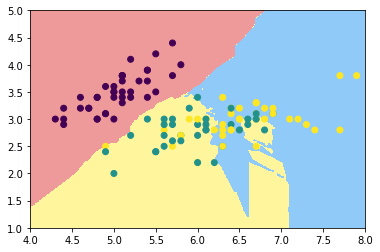

In [70]:
from sklearn.neighbors import KNeighborsClassifier

kne_clf = KNeighborsClassifier(n_neighbors=10)
kne_clf.fit(X_train,Y_train)

split_boundary_plot(kne_clf,[4,8,1,5])
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

In [143]:
np.random.seed(666)
x = np.random.normal(0,1,size=(200,2))
y =np.array( x[:,0]**2 + x[:,1]**2 < 1.5,dtype='int')

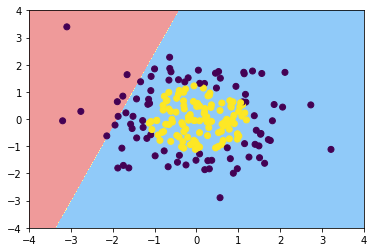

In [144]:
#逻辑回归   直线
log_reg.fit(x,y)
log_reg.score(x,y)
split_boundary_plot(log_reg,[-4,4,-4,4])
plt.scatter(x[:,0],x[:,1],c=y)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

D:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


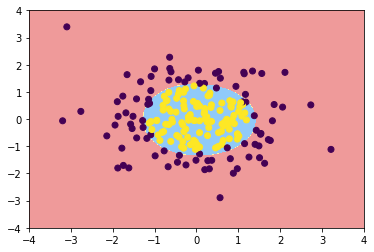

In [168]:
def poly_log_clf(degree):
    return Pipeline([
        ('Poly',PolynomialFeatures(degree=degree)),
        ('stand',StandardScaler()),
        ('log',LogisticRegression(solver='lbfgs'))
    ])

#多项式 
log_clf2 = poly_log_clf(degree=5)
log_clf2.fit(x,y)
split_boundary_plot(log_clf2,[-4,4,-4,4])
plt.scatter(x[:,0],x[:,1],c=y)

In [169]:
def best_params():
    best_score = 0.0
    best_i = 0.0
    for i in range(30):
        log = poly_log_clf(i)
        log.fit(x,y)
        score = log.score(x,y)
        if score > best_score:
            best_score = score
            best_degree = i
    return best_score,best_degree

        

In [170]:
best = best_params()
print("Best_score:",best[0])
print("Best_degree:",best[1])

Best_score: 0.96
Best_degree: 2


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
Y = np.array(X[:,0]**2 + X[:,1] < 1.5,dtype='int')
for _ in range(20):
    Y[np.random.randint(200)] = 1

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=666)

In [48]:
def split_boundary_plot(model,axis):
    x = np.linspace(axis[0],axis[1],500)
    y = np.linspace(axis[2],axis[3],500)
    
    X,Y = np.meshgrid(x,y)
    Z = model.predict(np.c_[X.ravel(),Y.ravel()])
    zz = Z.reshape(X.shape)
    
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x,y,zz,cmap=cmap)
    
def poly_log_clf(degree,c,penalty):
    return Pipeline([
        ('Poly',PolynomialFeatures(degree=degree)),
        ('stand',StandardScaler()),
        ('log',LogisticRegression(C=c,penalty=penalty))
    ])


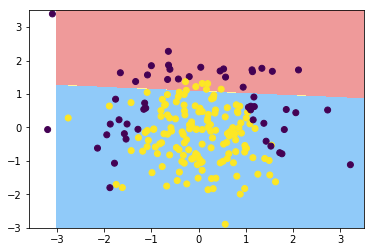

In [28]:
poly_log = poly_log_clf(degree=1)
poly_log.fit(X_train,Y_train)

split_boundary_plot(poly_log,axis=[-3,3.5,-3,3.5])
plt.scatter(X[:,0],X[:,1],c=Y)

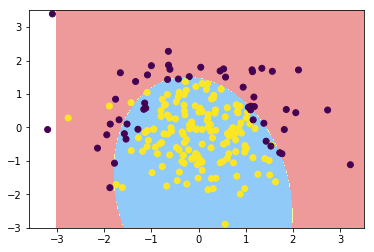

In [31]:
poly_log1 = poly_log_clf(degree=2)
poly_log1.fit(X_train,Y_train)

split_boundary_plot(poly_log1,axis=[-3,3.5,-3,3.5])
plt.scatter(X[:,0],X[:,1],c=Y)

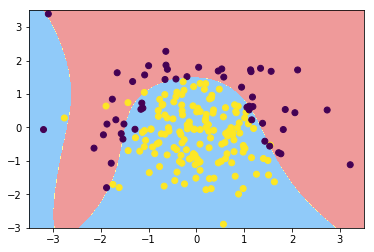

In [43]:
poly_log2 = poly_log_clf(degree=20,c=1,penalty='l2')
poly_log2.fit(X_train,Y_train)

split_boundary_plot(poly_log2,axis=[-3.5,3.5,-3,3.5])
plt.scatter(X[:,0],X[:,1],c=Y)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


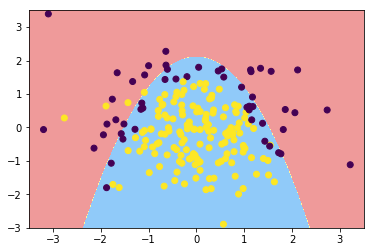

In [53]:
poly_log3 = poly_log_clf(degree=20,c=0.1,penalty='l1')
poly_log3.fit(X_train,Y_train)

split_boundary_plot(poly_log3,axis=[-3.5,3.5,-3,3.5])
plt.scatter(X[:,0],X[:,1],c=Y)

### OVO OVR

In [54]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

D:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [90]:
iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)


In [87]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)
log.score(X_test,Y_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9473684210526315

### OVR 

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


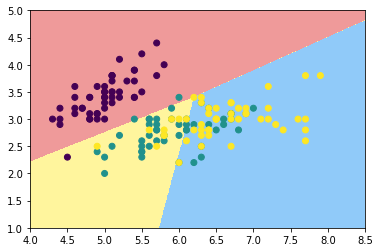

In [91]:
ovr = LogisticRegression(multi_class='ovr')
ovr.fit(X_train,Y_train)

split_boundary_plot(ovr,[4,8.5,1,5])
plt.scatter(X[:,0],X[:,1],c=Y)

### OVO 

0.7894736842105263

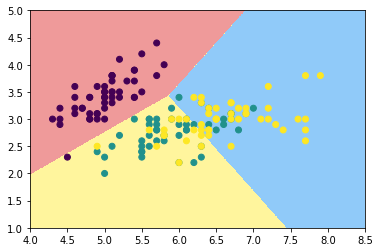

In [92]:
ovo = LogisticRegression(multi_class='multinomial',solver='newton-cg')
ovo.fit(X_train,Y_train)

split_boundary_plot(ovo,[4,8.5,1,5])
plt.scatter(X[:,0],X[:,1],c=Y)
ovo.score(X_test,Y_test)

## 使用所有数据

In [108]:
X = iris.data
Y = iris.target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=666)

In [109]:
#默认
log_reg = LogisticRegression(multi_class='ovr',solver='lbfgs')
log_reg.fit(X_train,Y_train)
log_reg.score(X_test,Y_test)

0.9736842105263158

In [110]:
#ovr
log_reg2 = LogisticRegression(multi_class='ovr',solver='lbfgs')
log_reg2.fit(X_train,Y_train)
log_reg2.score(X_test,Y_test)

0.9736842105263158

In [111]:
#ovo
log_reg1 = LogisticRegression(multi_class='multinomial',solver='newton-cg')
log_reg1.fit(X_train,Y_train)
log_reg1.score(X_test,Y_test)

1.0

# OVO 比 OVR 准确 

### OVO和OVR 的类

In [112]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [116]:
ovo = OneVsOneClassifier(log_reg2)
ovo.fit(X_train,Y_train)
ovo.score(X_test,Y_test)

1.0

In [118]:
ovr = OneVsRestClassifier(log_reg2)
ovr.fit(X_train,Y_train)
ovr.score(X_test,Y_test)

0.9736842105263158

# 近邻分类器 
1.最近邻分类器是消极学习法
2.KNN算法中，所选择的邻居都是已经正确分类的对象。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。
3.KNN 分类的计算复杂度和训练集中的文档数目成正比，也就是说，如果训练集中文档总数为 n，那么 KNN 的分类时间复杂度为O(n)。
4.选择合适的K值的重要性。如果太小，则最近邻分类器容易受到训练数据的噪声而产生的过分拟合的影响；相反，如果K太大，最近分类器可能会误会分类测试样例，因为最近邻列表中可能包含远离其近邻的数据点
5.特征空间中两个实例点的距离是两个实例相似程度的反映

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
raw_data_X = [[3.39,2.33],
             [3.11,1.78],
             [1.34,3.36],
             [3.58,4.67],
             [2.28,4.67],
             [7.42,4.69],
             [5.74,3.53],
             [9.17,2.51],
             [7.79,3.42],
             [7.93,0.79]]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()
knn.fit(raw_data_X,raw_data_y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [113]:
x = np.array([5.,3.])
x

array([5., 3.])

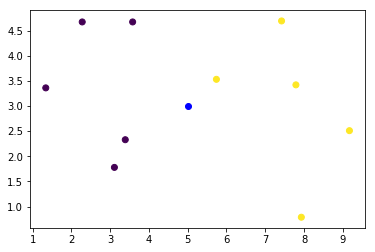

In [114]:
plt.scatter([raw_data_X[i][0] for i in range(len(raw_data_X))],[raw_data_X[i][1] for i in range(len(raw_data_X))],c=raw_data_y)
plt.scatter(x[0],x[1],c='b')

In [74]:
from collections import Counter

In [123]:
# def distance(x, X):
#     distances = []
#     for raw in X:
#         dt = np.sqrt(np.sum((raw - x)**2))
#         distances.append(dt)
#     return distances

def knn(x,X,n_neighbors=6):
    distances = [np.sqrt(np.sum((raw - x)**2)) for raw in X]
    arg_distances = np.argsort(distances)
    topK_y = [raw_data_y[i] for i  in arg_distances[:n_neighbors]]

    votes = Counter(topK_y)

    y_predict = votes.most_common(1)[0][0]
    return y_predict


In [124]:
y_predict = knn(x,raw_data_X,1)
y_predict

1

# Grid Search

In [130]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [129]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [147]:
# 网格参数
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [134]:
knn_clf = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf,param_grid,n_jobs=-1)
knn_grid.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [145]:
knn_grid.best_estimator_
knn_grid.best_params_
knn_grid.best_score_

0.9866369710467706

In [148]:
best_knn = knn_grid.best_estimator_

best_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='distance')

In [149]:
best_knn.score(X_test,y_test)

0.9822222222222222

# 数据归一化

## 最值归一化  normalization
适用于分布有明显边界的情况； 首outlier影响较大

归一化到0到1之间

## 均值方差归一化 standardization
书句分不没有明显的边界， 有可能存在极端数据值

把所有的数据诡异到均值为0 方差为1的分布中

## sklearn 中的 应用

In [154]:
#from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# 先 fit   计算train_X 的平均值 方差等
# 后 transfrom  归一化

# 交叉验证 寻找最优K
1.交叉验证（Cross validation)，交叉验证用于防止模型过于复杂而引起的过拟合.有时亦称循环估计， 是一种统计学上将数据样本切割成较小子集的实用方法。是可以先在一个子集上做分析， 而其它子集则用来做后续对此分析的确认及验证。 一开始的子集被称为训练集。而其它的子集则被称为验证集或测试集。交叉验证是一种评估统计分析、机器学习算法对独立于训练数据的数据集的泛化能力
2.尽量满足：1）训练集的比例要足够多，一般大于一半
         2）训练集和测试集要均匀抽样


# 支持向量机- -SVM
1.常简称为SVM，又名支持向量网络[1]）是在分类与回归分析中分析数据的监督式学习模型与相关的学习算法。给定一组训练实例，每个训练实例被标记为属于两个类别中的一个或另一个，SVM训练算法创建一个将新的实例分配给两个类别之一的模型，使其成为非概率二元线性分类器。SVM模型是将实例表示为空间中的点，这样映射就使得单独类别的实例被尽可能宽的明显的间隔分开。然后，将新的实例映射到同一空间，并基于它们落在间隔的哪一侧来预测所属类别
2.当数据未被标记时，不能进行监督式学习，需要用非监督式学习，它会尝试找出数据到簇的自然聚类，并将新数据映射到这些已形成的簇。将支持向量机改进的聚类算法被称为支持向量聚类[2]，当数据未被标记或者仅一些数据被标记时，支持向量聚类经常在工业应用中用作分类步骤的预处理。

3.可以很简单的解释这三者的关系
SVM=Support Vector Machine 是支持向量
SVC=Support Vector Classification就是支持向量机用于分类，
SVR=Support Vector Regression.就是支持向量机用于回归分析


# 线性
评价线性回归  RMSE MSE R Squared

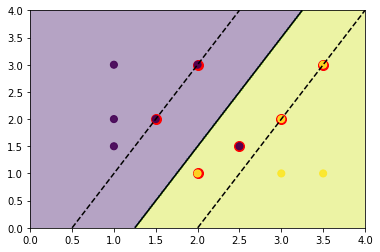

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5 #labels
#进行创建模型，训练数据，线性分类,
#C回归系数，斜率，代表计算边界的数据点多少，越小包括的数据点越多
svc = svm.SVC(kernel='linear',C=1).fit(x,y) 
X,Y = np.mgrid[0:4:200j,0:4:200j]  #算出x,y的所有交点
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])  #用函数绘制决策边界

Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4) 
#contour和contourf都是画三维等高线图的，不同点在于contour() 是绘制轮廓线，
#contourf()会填充轮廓。除非另有说明，否则两个版本的函数是相同的。
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=100,facecolors='r') #计算间隔的按数据点高亮显示
plt.contour(X,Y,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1]) #指定等高线 + -
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
# svc.predict([[2,1]])  #测试
# svc.support_vectors_  计算距离的数据点
#svc.support_  计算距离的数据点是原数据中第几个数据


# 非线性 SCV ---多项式内核系统

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


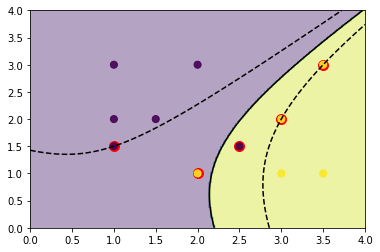

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5 #labels
#进行创建模型，训练数据，线性分类,C 参数代表计算边界的数据点多少，越小包括的数据点越多
svc = svm.SVC(kernel='poly',C=1,degree=3).fit(x,y)  #内核，degree指定多项式的次数
X,Y = np.mgrid[0:4:200j,0:4:200j]  #算出x,y的所有交点
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])  #用函数绘制决策边界

Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4) 
#contour和contourf都是画三维等高线图的，不同点在于contour() 是绘制轮廓线，
#contourf()会填充轮廓。除非另有说明，否则两个版本的函数是相同的。
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=100,facecolors='r') #计算间隔的按数据点高亮显示
plt.contour(X,Y,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1]) #指定等高线 + -
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
# svc.predict([[2,1]])  #测试
# svc.support_vectors_  计算距离的数据点
#svc.support_  计算距离的数据点是原数据中第几个数据


# 非线性内核为向径基函数 --- RBF
1.把数据点分到沿径向方向分布
2.SVM模型有两个非常重要的参数C与gamma。其中 C是惩罚系数，即对误差的宽容度。c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差。gamma是选择RBF函数作为kernel后，该函数自带的一个参数。隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度。


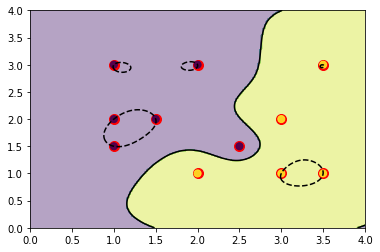

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5 #labels
#进行创建模型，训练数据，线性分类,C 参数代表计算边界的数据点多少，越小包括的数据点越多
svc = svm.SVC(kernel='rbf',C=1,gamma=3).fit(x,y)  #gamma越大，计算边界数据点越少
X,Y = np.mgrid[0:4:200j,0:4:200j]  #算出x,y的所有交点
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])  #用函数绘制决策边界

Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4) 
#contour和contourf都是画三维等高线图的，不同点在于contour() 是绘制轮廓线，
#contourf()会填充轮廓。除非另有说明，否则两个版本的函数是相同的。
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=100,facecolors='r') #计算间隔的按数据点高亮显示
plt.contour(X,Y,Z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1]) #指定等高线 + -
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
# svc.predict([[2,1]])  #测试
# svc.support_vectors_  计算距离的数据点
#svc.support_  计算距离的数据点是原数据中第几个数据


# 绘制SVM分类器对Iris数据集的分类效果

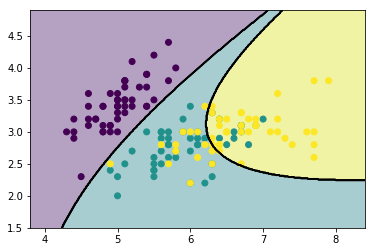

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

svc = svm.SVC(kernel='poly',C=1,degree=3,gamma='auto').fit(x,y)
x_min,x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5,x[:,1].max() + .5

h = .01
X,Y = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)


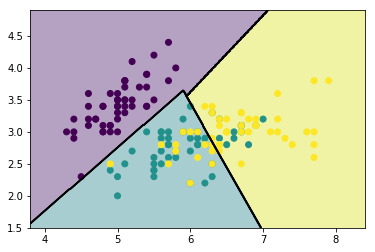

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

svc = svm.SVC(kernel='linear',C=1).fit(x,y)
x_min,x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5,x[:,1].max() + .5

h = .01
X,Y = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)
# plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=50,facecolors='g')


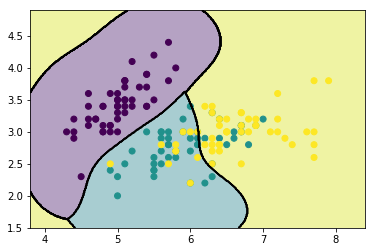

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

svc = svm.SVC(kernel='rbf',C=1,gamma=3).fit(x,y)
x_min,x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5,x[:,1].max() + .5

h = .01
X,Y = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)
# plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=50,facecolors='g')
# svc.predict([[7,3]])

# 支持向量回归 ---- SVR
svr 生成的模型也只依赖于部分训练数据   diabets数据集

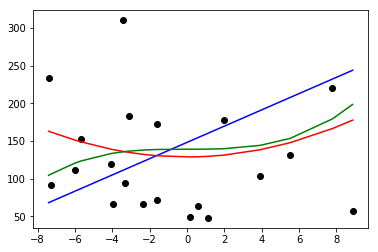

In [2]:
from sklearn import datasets
import  matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

diabets = datasets.load_diabetes()
x_train = diabets.data[:-20]
y_train = diabets.target[:-20]
x_test = diabets.data[-20:]
y_test = diabets.target[-20:]

x0_test = x_test[:,2]
x0_train = x_train[:,2]
x0_test = x0_test[:,np.newaxis]
x0_train = x0_train[:,np.newaxis]

x0_test.sort(axis=0)
x0_test = x0_test*100
x0_train = x0_train*100
svr0 = svm.SVR(kernel='linear',C=10).fit(x0_train,y_train)
svr1= svm.SVR(kernel='poly',C=10,degree=2,gamma='auto').fit(x0_train,y_train)
svr2 = svm.SVR(kernel='poly',C=10,degree=3,gamma='auto').fit(x0_train,y_train)
y0 = svr0.predict(x0_test)
y1 = svr1.predict(x0_test)
y2 = svr2.predict(x0_test)

plt.scatter(x0_test,y_test,color='k')
plt.plot(x0_test,y0,color='b')
plt.plot(x0_test,y1,color='r')
plt.plot(x0_test,y2,color='g')
plt.show()

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

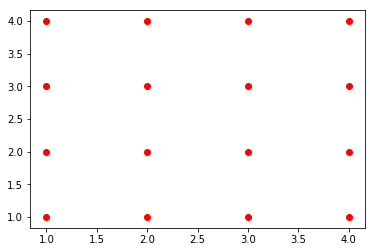

In [16]:
x,y = np.meshgrid(np.arange(1,5,1),np.arange(1,5,1))
plt.scatter(x.ravel(),y.ravel(),c='r')
x

# 识别手写体数字
1.待分析不仅涉及数值或字符串类型的出路，还涉及图像和声音文件的处理

这类数据分析问题需要用到估计器
sklearn机器学习算法的实现-估计器
在sklearn中，估计器(estimator)是一个重要的角色，分类器和回归器都属于estimator，是一类实现了算法的API。
fit方法用于从训练集中学习模型参数
transform用学习到的参数转换数据
1、用于分类的估计器：
sklearn.neighbors k-近邻算法
sklearn.naive_bayes 贝叶斯
sklearn.linear_model.LogisticRegression 逻辑回归
2、用于回归的估计器：
sklearn.linear_model.LinearRegression 线性回归
sklearn.linear_model.Ridge 岭回归
估计器的工作流程：
https://img2018.cnblogs.com/blog/1156642/201903/1156642-20190317152611537-57101254.png

3.图片的每个像素点作为 个特征。比如1个图片是 200X200的分辨率，那么我们就有
40000个特 ，即特征向的长度是 40000


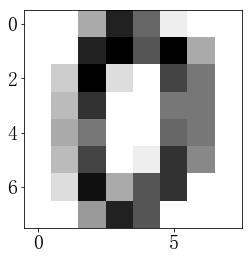

In [131]:
from sklearn import svm
from sklearn import datasets
digits = datasets.load_digits()
# digits.DESCR #读取数据集自带的大量的说明信息
#digits.images 数组的每个元素代表一张图像，每个元素为8X8形状的矩阵，
#矩阵各项为数值类型，每个数值对应一种灰度等级，其中0对应白色，15对应黑色
digits.images[0]  #源数据

import matplotlib.pylab as plt
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')
#interplotation参数是设置了边界的模糊度，或者是图片的模糊度
# digits.target  #目标值
# digits.target.size  #图片数目，目标值数目

# 学习和预测

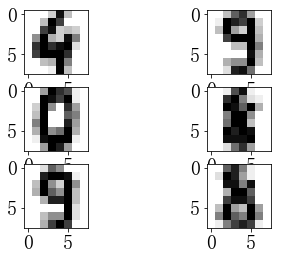

In [132]:
plt.subplot(321)
plt.imshow(digits.images[1791],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796],cmap=plt.cm.gray_r,interpolation='nearest')
digits.target[-6:]

svc = svm.SVC(gamma=0.001,C=100)
svc.fit(digits.data[1:1790],digits.target[1:1790])
x = svc.predict(digits.data[-6:])
y = digits.target[-6:]

# 训练好的模型的保存和导出

In [133]:
#模型的保存 
from sklearn.externals import joblib
joblib.dump(svc,'digits_svm.pkl')
svc = joblib.load('digits_svm.pkl')
svc.predict(digits.data[-6:])
svc.score(digits.data[-6:],digits.target[-6:])

1.0

In [1]:
# svc.predict_proba()

# k-mean 无监督聚类算法

In [9]:
from sklearn import datasets
import  matplotlib.pyplot as plt 
import numpy as np
iris = datasets.load_iris()
X, y = iris.data, iris.target

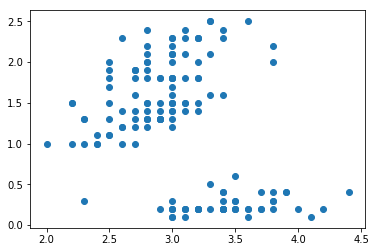

In [8]:
data = X[:,[1,3]]
plt.scatter(data[:,0],data[:,1])

In [10]:
def distanse(p1,p2):
    """计算欧氏距离"""
    tmp = np.sum((p1-p2)**2)
    return np.sqrt(tmp)

In [25]:
# 随机质心
def rand_center(data,k):
    n = data.shape[1]  #features
    centroids = np.zeros((k,n))  #init with (0,0)
    for i in range(n):
         dmin, dmax =np.min(data[:,i]), np.max(data[:,i])
         centroids[:,i] = dmin + (dmax-dmin) * np.random.rand(k)
    return centroids

### k均值聚类
这个基本的算法只需要明白两点。

给定一组质心，则簇更新，所有的点被分配到离其最近的质心中。
给定k簇，则质心更新，所有的质心用其簇的均值替换
当簇不在有更新的时候，迭代停止。当然kmeans有个缺点，就是可能陷入局部最小值，有改进的方法，比如二分k均值，当然也可以多计算几次，去效果好的结果。

In [35]:
def kmeans(data,k=2):
    def _distancea(p1,p2):
        tmp = np.sum((p1-p2)**2)
        return np.sqrt(tmp)
    
    def _rand_center(data,k):
        n = data.shape[1]  #features
        centroids = np.zeros((k,n))  #init with (0,0)
        for i in range(n):
             dmin, dmax =np.min(data[:,i]), np.max(data[:,i])
             centroids[:,i] = dmin + (dmax-dmin) * np.random.rand(k)
        return centroids
    
    def _converged(centroids1,centroids2):
        """If centroid not changed,we say converged"""
        set1 = set([tuple(c) for c in centroids1])
        set2 = set([tuple(c) for c in centroids2])
        return (set1 == set2)
    
    n = data.shape[1]
    centroids = _rand_center(data,k)
    label = np.zeros(n,dtype=np.int) #track the nearest centroid
    assement = np.zeros(n) # for the assement of our model
    converged = False
    
    with not converged:
        old_centroids  = np.copy(centroids)
        for i in range(n):
            # determine the nearest centroid and track it with label
            min_dist, min_index = np.inf, -1
            for j in range(k):
                dist  = _distancea(daia[i],centroids[j])

            
        
    